# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-v0_8-darkgrid')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
# Import necessary libraries
import pandas as pd

# Load the dataset
titanic_data = pd.read_csv('titanic.csv')

# Display the first five rows of the dataset
print(titanic_data.head())


   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0      3   
1           1            2         1      1   
2           2            3         1      3   
3           3            4         1      1   
4           4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y
y = titanic_data['Survived']
X = titanic_data.drop(columns=['Survived'])

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (712, 12)
X_test shape: (179, 12)
y_train shape: (712,)
y_test shape: (179,)


## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [5]:
# Check for missing values
print(titanic_data.isnull().sum())

# Replace missing values with a placeholder or drop them
# Here, we will fill missing values with the median for numerical columns and the mode for categorical columns

# Fill missing numerical values with the median
for col in titanic_data.select_dtypes(include=['float64', 'int64']).columns:
    titanic_data[col].fillna(titanic_data[col].median(), inplace=True)

# Fill missing categorical values with the mode
for col in titanic_data.select_dtypes(include=['object']).columns:
    titanic_data[col].fillna(titanic_data[col].mode()[0], inplace=True)

# Encode categorical variables using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, drop_first=True)

# Create X and y
y = titanic_data['Survived']
X = titanic_data.drop(columns=['Survived'])

# Split into training and test sets
from sklearn.model_selection import train_test_split
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

from sklearn.tree import DecisionTreeClassifier

# Instantiate a decision tree classifier with 'entropy' criterion and random_state=SEED
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Display the classifier parameters to verify
print(dt)


Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
X_train shape: (712, 1728)
X_test shape: (179, 1728)
y_train shape: (712,)
y_test shape: (179,)
DecisionTreeClassifier(criterion='entropy', random_state=1)


C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_24640\889259139.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data[col].fillna(titanic_data[col].median(), inplace=True)
C:\Users\svijayaraghavan\AppData\Local\Temp\ipykernel_24640\889259139.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions using the test set
y_pred = dt.predict(X_test)

# Calculate the AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the AUC
print(f'AUC is: {roc_auc:.2f}')


AUC is: 0.75


## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

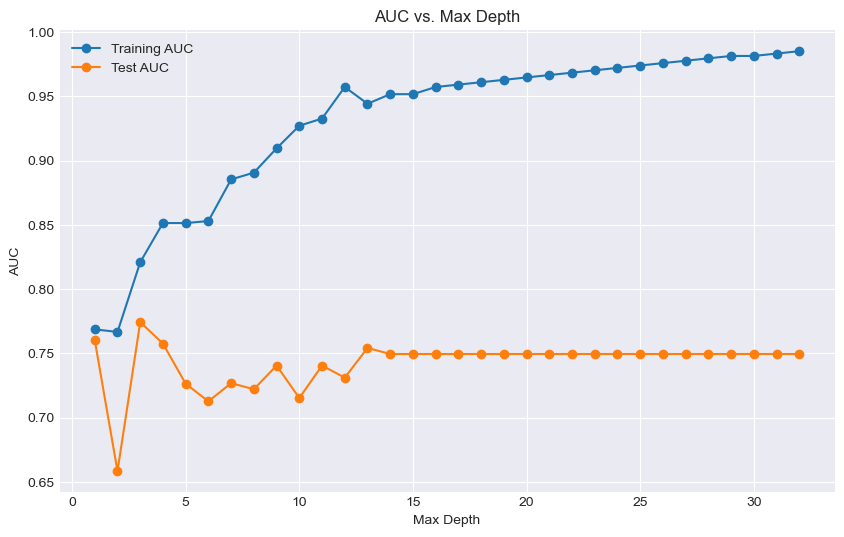

In [7]:
# Identify the optimal tree depth for given data
import numpy as np

# Create an array for max_depth values ranging from 1 to 32
max_depths = np.arange(1, 33)

train_auc = []
test_auc = []

for depth in max_depths:
    # Instantiate the decision tree classifier with the current max_depth
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=SEED)
    
    # Fit the classifier to the training data
    dt.fit(X_train, y_train)
    
    # Calculate the training AUC
    y_train_pred = dt.predict(X_train)
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    
    # Calculate the test AUC
    y_test_pred = dt.predict(X_test)
    test_auc.append(roc_auc_score(y_test, y_test_pred))

import matplotlib.pyplot as plt

# Plot the training and test AUC for each max_depth value
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_auc, label='Training AUC', marker='o')
plt.plot(max_depths, test_auc, label='Test AUC', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.title('AUC vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Your observations here 

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

ValueError: x and y must have same first dimension, but have shapes (10,) and (32,)

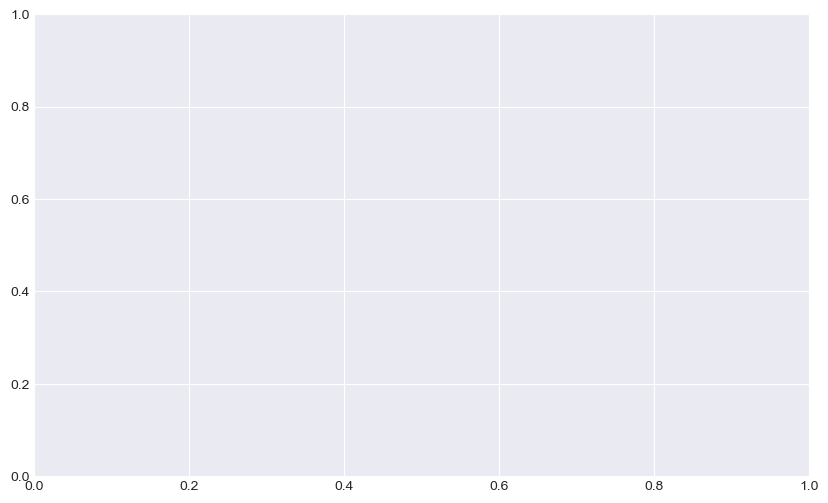

In [8]:
# Identify the optimal min-samples-split for given data
import numpy as np

# Create an array for min_samples_split values ranging from 0.1 to 1 with an increment of 0.1
min_samples_splits = np.arange(0.1, 1.1, 0.1)

import numpy as np

# Create an array for min_samples_split values ranging from 0.1 to 1 with an increment of 0.1
min_samples_splits = np.arange(0.1, 1.1, 0.1)

import matplotlib.pyplot as plt

# Plot the training and test AUC for each min_samples_split value
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_auc, label='Training AUC', marker='o')
plt.plot(min_samples_splits, test_auc, label='Test AUC', marker='o')
plt.xlabel('Min Samples Split')
plt.ylabel('AUC')
plt.title('AUC vs. Min Samples Split')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

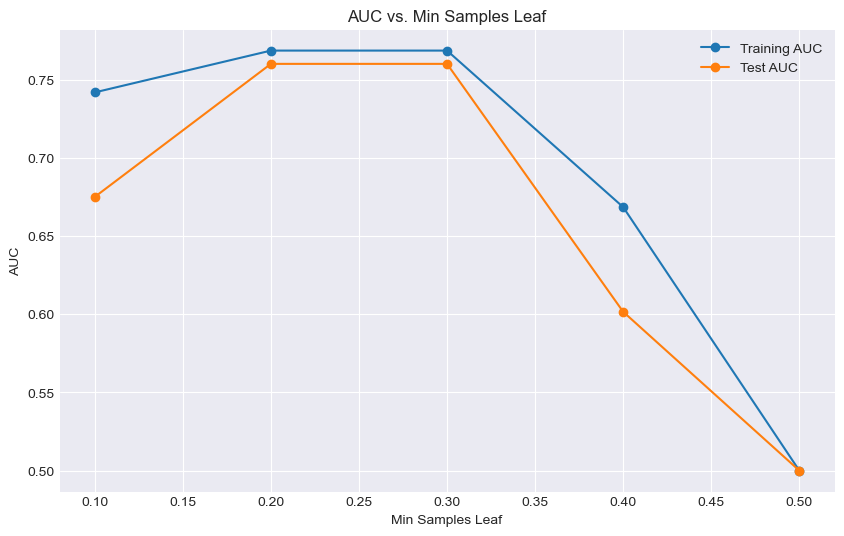

In [9]:
# Calculate the optimal value for minimum sample leafs
import numpy as np

# Create an array for min_samples_leaf values ranging from 0.1 to 0.5 with an increment of 0.1
min_samples_leafs = np.arange(0.1, 0.6, 0.1)

train_auc = []
test_auc = []

for leaf in min_samples_leafs:
    # Instantiate the decision tree classifier with the current min_samples_leaf
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf, random_state=SEED)
    
    # Fit the classifier to the training data
    dt.fit(X_train, y_train)
    
    # Calculate the training AUC
    y_train_pred = dt.predict(X_train)
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    
    # Calculate the test AUC
    y_test_pred = dt.predict(X_test)
    test_auc.append(roc_auc_score(y_test, y_test_pred))

import matplotlib.pyplot as plt

# Plot the training and test AUC for each min_samples_leaf value
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leafs, train_auc, label='Training AUC', marker='o')
plt.plot(min_samples_leafs, test_auc, label='Test AUC', marker='o')
plt.xlabel('Min Samples Leaf')
plt.ylabel('AUC')
plt.title('AUC vs. Min Samples Leaf')
plt.legend()
plt.grid(True)
plt.show()


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

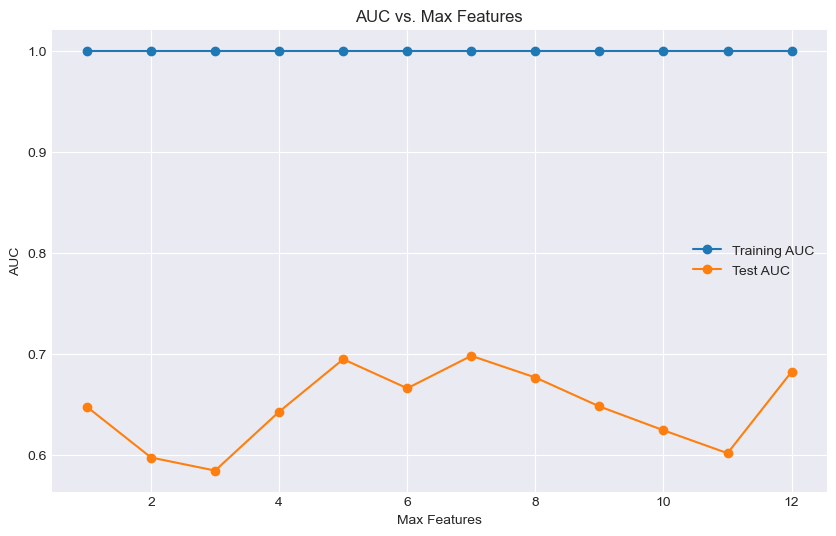

In [10]:
# Find the best value for optimal maximum feature size
import numpy as np

# Create an array for max_features values ranging from 1 to 12
max_features = np.arange(1, 13)

train_auc = []
test_auc = []

for features in max_features:
    # Instantiate the decision tree classifier with the current max_features
    dt = DecisionTreeClassifier(criterion='entropy', max_features=features, random_state=SEED)
    
    # Fit the classifier to the training data
    dt.fit(X_train, y_train)
    
    # Calculate the training AUC
    y_train_pred = dt.predict(X_train)
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    
    # Calculate the test AUC
    y_test_pred = dt.predict(X_test)
    test_auc.append(roc_auc_score(y_test, y_test_pred))

import matplotlib.pyplot as plt

# Plot the training and test AUC for each max_features value
plt.figure(figsize=(10, 6))
plt.plot(max_features, train_auc, label='Training AUC', marker='o')
plt.plot(max_features, test_auc, label='Test AUC', marker='o')
plt.xlabel('Max Features')
plt.ylabel('AUC')
plt.title('AUC vs. Max Features')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Instantiate the decision tree classifier with the optimal hyperparameters
dt = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5, 
    min_samples_split=0.2, 
    min_samples_leaf=0.1, 
    max_features=8, 
    random_state=SEED
)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Make predictions using the test set
y_pred = dt.predict(X_test)

# Calculate the AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the AUC
print(f'AUC is: {roc_auc:.2f}')


AUC is: 0.50


In [ ]:
# Your observations here

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 